<b> Description : Predicting the Crime Rate 

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading data from .csv file
data=pd.read_csv('Property_fraud.csv')
data.head(100)

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
...,...,...,...,...,...,...,...,...
95,Odisha,2003,Burglary - Property,3. Burglary,1231,2910,13996401,48730506
96,Puducherry,2003,Burglary - Property,3. Burglary,56,126,1679750,6744373
97,Punjab,2003,Burglary - Property,3. Burglary,797,2094,19620531,86923821
98,Rajasthan,2003,Burglary - Property,3. Burglary,1588,5779,50150183,129565091


In [3]:
data.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

In [4]:
data.drop(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name'],inplace=True,axis=1)

We dont need above mentioned columns for analysis , hence dropped them.

In [5]:
data.columns

Index(['Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

---

<b>Identifying Null Value

In [6]:
data.isnull().sum()

Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

<b> Data Visualisation 

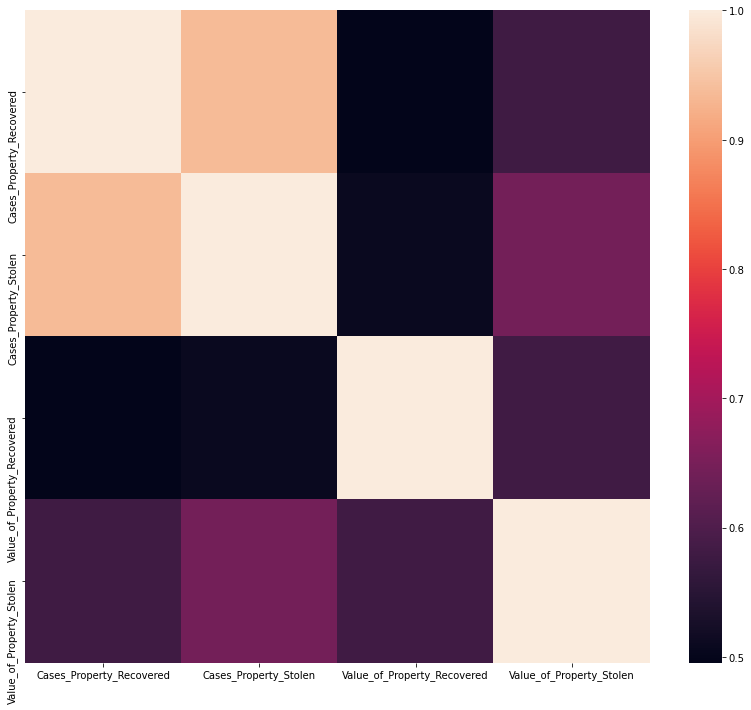

In [7]:
#using Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr())
plt.show()

As We could not identify much relation from above Heatmap plot. Using Graphical set for the same below:

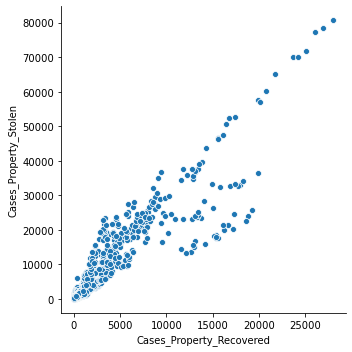

In [16]:
#Relation between confirmed and Recovered cases
sns.relplot(x='Cases_Property_Recovered',y="Cases_Property_Stolen",data=data)

<b>Using Linear Regression Algorithm 


In [8]:
#using Linear regression

y=data['Cases_Property_Stolen']
x=data.drop(['Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],axis=1)

In [9]:
y

0          64
1        7134
2         248
3        2423
4        3231
        ...  
2444    21509
2445      879
2446    35068
2447     2234
2448    23759
Name: Cases_Property_Stolen, Length: 2449, dtype: int64

In [10]:
x

,Cases_Property_Recovered
0,27
1,3321
2,66
3,539
4,367
...,...
2444,16125
2445,192
2446,9130
2447,964


<b> Importing Regression Model Libraries 

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [12]:
scaler = MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Cases_Property_Recovered
0,0.000966
1,0.118777
2,0.002361
3,0.019278
4,0.013126
...,...
2444,0.576717
2445,0.006867
2446,0.326538
2447,0.034478


In [13]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [14]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print (model.score(X_test,y_test))

0.8205180079482065
